# GLM vs. Linear Model

Use any data set having continuous variables

Perform both GLM and linear regression models on the data set that you selected.

Which model performs better?

Explain  differences in performance of the two models and the implications of your findings.

Explain the settings that you used to produce the results.

Click on the "Week Four Assignment - Final Exam" link above to submit your assignment, as well as to get more information regarding the due date and grading rubric.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("/Users/RyanPaw/ANA620/diamonds.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [5]:
from sklearn.linear_model import LinearRegression

features = ['carat']
target = 'price'

x = df[features].values.reshape(-1, len(features))
y = df[target].values

lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [6]:
lm.coef_

array([7756.42561797])

In [7]:
lm.intercept_

-2256.3605800452747

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Price')

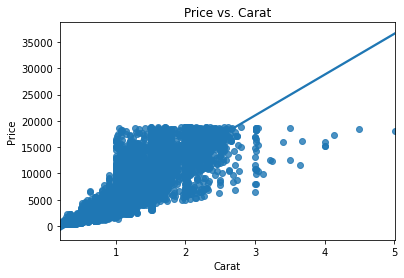

In [8]:
sns.regplot(x,y)

plt.title('Price vs. Carat')
plt.xlabel('Carat')
plt.ylabel('Price')

In [9]:
#Linear regression model 
import statsmodels.formula.api as smf

model = smf.ols(formula='y ~ x', data=df)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.026e+06
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:46:11   Log-Likelihood:                -2887.5
No. Observations:               53940   AIC:                             5779.
Df Residuals:                   53938   BIC:                             5797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0469      0.006      8.196      0.000       0.036       0.058
x              0.9924      0.001   1012.793      0.000       0.990       0.994
==============================================================================
Omnibus:                   250707.859   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2207050005951.312
Skew:                         167.627   Prob(JB):                         0.00
Kurtosis:                   31338.121   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#GLM - Gamma model
import statsmodels.api as sm
from statsmodels.formula.api import glm
model_gam = glm(formula = 'y ~ x', data = df, family = sm.families.Gamma()).fit()
print(model_gam.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                53940
Model:                            GLM   Df Residuals:                    53938
Model Family:                   Gamma   Df Model:                            1
Link Function:          inverse_power   Scale:                       0.0028285
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 31 Jan 2021   Deviance:                       592.35
Time:                        12:46:13   Pearson chi2:                     153.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3397      0.000   1659.179      0.0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:296: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:735: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


In [11]:
model_gam.params

Intercept    0.339730
x           -0.027795
dtype: float64

In [13]:
#Gamma formula
b0 = 0.339730
b1 = -0.027795
x1 = x
y1 = b0 + (b1/x1) 

Text(0.5, 1.0, 'GLM - Gamma distribution')

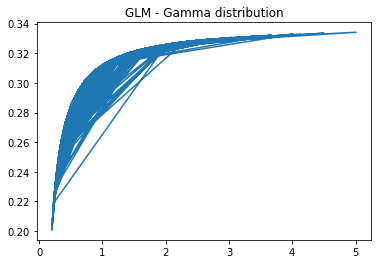

In [14]:
plt.plot(x1,y1)
plt.title('GLM - Gamma distribution')

Text(0.5, 1.0, 'Price vs. Carat')

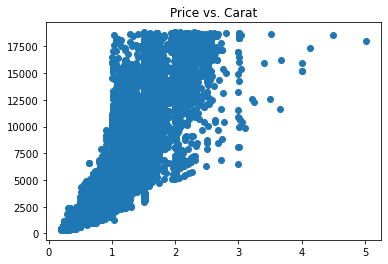

In [15]:
plt.scatter(x,y)
plt.title('Price vs. Carat')

I used the Diamond dataset that contains attributes of 53,940 diamonds. I used 'price' as my dependent variable and 'carat' as my independent variable. These variables are positively correlated with each other with a correlation value of 0.92. 

In my linear regression model, x1 was calculated to be 0.992. The standard error was calculated to be 0.001. Our model can be represented as: 

Price = -2256.36 + 7756.43 * Carat 

GLM consists of three components:
* Random component: an exponential family of probability distributions;
* Systematic component: a lineaictor; and
* Link function: that generalizes liner predar regression.

In my Generalized Linear Model (GLM), I used a Gamma distribution, which favors continuous variables. My x was calculated to be -0.0278 and my intercept was calculated to be 0.339730. The standard error was calculated to be 3.25 * 10^-5. Pearson chi2 measures the goodness of fit of the dependent/independent variable relationship. The model had a Pearson chi2 value of 153, which is considered high. 

In both models, the p-value is <0.05, which shows that it is statistically significant and we can reject the null hypothesis (H0) and accept the alternative hypothesis (H1).

Out of the 2 models, the GLM model performs better because it's a better fit for our data. The 'GLM - Gamma distribution' graph follows the curved path of the data points better than the linear regression. In the linear regression graph, 'Price vs. Carat', the straight line doesn't follow the data points as well as the 'GLM - Gamma distribution' graph. 